## Final Project Submission

* Student name:  Noah-John Hizon
* Student pace: part time 
* Scheduled project review date/time: 11/19 5:00 PM EST
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Film Studio - Initial Recommendations

## Overview


The focus of this project is to provide insights for Microsoft, in order to better inform their strategy in their foray of creating a new movie studio. Data regarding films gathered from websites such as IMDB and The Numbers is used to compose informed decisions. These decisions will help Microsoft maximize audience engagement, profit, and perceived success in their resulting films.



## Business Problem 


Microsoft has decided to create a new movie studio, but they are ill informed about the process of creating successful films. The relative "success" of a movie is a result of a variety of factors; even from viewer to viewer, there is an inherent subjectivity in reported satisfaction. While the profit a film makes is an undeniably objective metric of success, it rarely paints the picture of the impact a whole film can have on its audience. Data from online databases will be aggregated/summarized in order to determine defining characteristics of successful films. Isolating prime directors, actors/actresses, and genres to pursue will assist Microsoft in creating films that are profitable from both audience and financial standpoints. 


## Data Understanding


A variety of data is pulled from the online movie databases IMDB and The Numbers. As seen below, the imported data contains a variety of information related to films, their working crew, financial information, and audience reception. The transformation/combination of variables within these databases will be used to isolate factors of success.

From the perspective of the IMDB data, all tables can be linked with 2 variables/primary keys, 'tconst', which directly correlates to a movie's title, and 'nconst', which directly correlates to each staff who worked on a given movie (e.g. directors, actprs where records are available). The key metric of success for this dataset are the user ratings, judged from a scale of 1-10, the average taken for each distinct movie.


From the perspective of the The Numbers dataset, financial information is correlated to each movie in the dataset, including how much was spent to create the movie (production_budget), how much money the movie made domestically (in its respective country, domestic_gross), and how much money the movie made internationally (worldwide_gross).

Seeing as The Numbers and IMBD are distinctly different datasets with differing primary identifiers, IMDB will be used as the primary dataset since it contains a larger variety of information for each film. Records from The Numbers will be joined where relevant. 


To supplement the information below, a rudimentary ERD is created to show the relationships between each of the tables. 

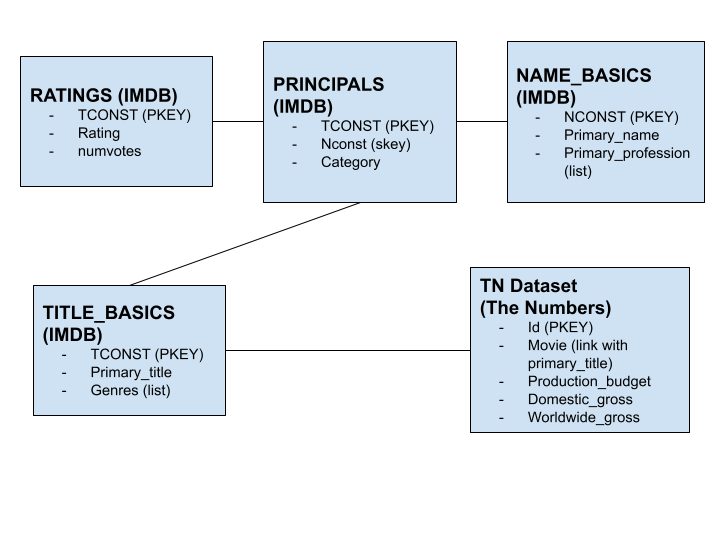

In [2]:
# Importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Standard Python packages are imported for analysis.

In [3]:
titlebasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz',header=0)

titlebasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### TITLE BASICS TABLE - IMDB

This table contains the primary title the film is known for (primary_title), the year the film started aggregating data (start_year), and its genres. The primary variable, 'tconst', will be used to link the other tables in the IMDB database.

In [4]:
namebasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz',header=0)

namebasics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


### NAME BASICS TABLE - IMDB

The primary key of this table is 'nconst', which stores each cast/crew member who worked on any film in the IMDB database with a unique identifier. 
Birth year and death year, are self explanatory. Upon a look at the first 5 rows, it was observed that not all entries in these columns were populated by a value. As this database seems to be mostly user reported, some deceased members are not be logged.

In [5]:
principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz', header=0)

principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


### PRINCIPALS TABLE - IMDB

This table links the film identifier 'tconst' with all people who worked in any given movie, using their 'nconst'value as an identifier, with 'category' describing their general role.


In [6]:
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz',header=0)

ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### RATINGS TABLE - IMDB


The ratings table contains a critical metric relevant to our analysis, the aggregate ratings each film got. As this metric is user reported, there is inherently some subjectivity in success determination, as well as variance in the number of reviews each film had. 

In [7]:
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',header=0)

tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### FINANCIAL DATASET - The Numbers

This table contains all financial information for each given film of the database. These numbers will be helpful in determining financial success of all movies in our dataset. 'production_budget' refers to the amount allocated to create the movie. 'domestic_gross' refers to the amount each movie made it its original respective release country. 'worldwide_gross' refers to the amount the movie made around the globe, 'domestic_gross' being included in this metric.



## Data Preparation



Within the cumulative IMDB database and TN database, there were several fields included which may be useful in other contexts, but not for the purpose of the identified business problem. The methodology for cleaning through the overall datasets can be found below. 

In [8]:
titlebasics=titlebasics.drop(['runtime_minutes','original_title'], axis=1)

While film runtime minutes may be an interesting metric to analyze for a different problem, it is safe to assume that film runtime likely has little correlation with financial/cultural success. Examples can be seen from relatively successful short films such as Disney+'s Us, Again, compared to terrible movies with long runtimes, such as Batman vs. Superman: Dawn of Justice. 

In [9]:
namebasics['death_year']=namebasics['death_year'].fillna(0)
namebasics=namebasics.loc[namebasics['death_year']==0]
namebasics['birth_year']=namebasics['birth_year'].fillna(3000)

Text(0.5, 1.0, 'Cast/Crew Birth Year Distribution')

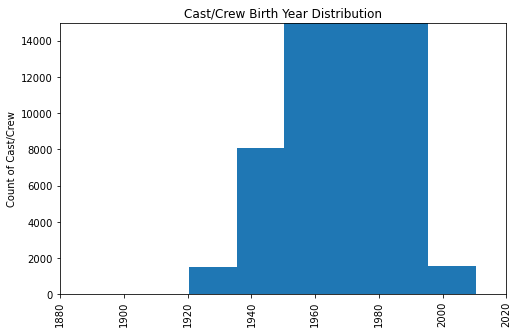

In [10]:
fig, ax5 = plt.subplots(ncols=1, figsize=(8, 5))
ax5.hist(namebasics['birth_year'],bins=200)
plt.xlim([1880,2020])
plt.ylim([0,15000])
ax5.tick_params(axis="x", labelrotation=90)
ax5.set_ylabel("Count of Cast/Crew")
ax5.set_title("Cast/Crew Birth Year Distribution")

In [11]:
namebasics=namebasics.loc[namebasics['birth_year']>1936]

In order to be as inclusive as possible while still remaining scrutinous with the data, null values were filled with 3000 for birth year, and 0 for the 'death_year'. The table was then filtered by 'birth_year', taking out all actors who were born before the year 1936, eliminating all actors over the age of 85. Film crew that have a definite populated death year are excluded from the table, in order to make sure all entries (as far as user reported status is concerned) depict live members. 

In [12]:
principals=principals.drop(['job','characters','ordering'],axis=1)

Since this table is used to link all films with their respective cast/crew members, it is best to not manipulate it using row filtration.
The columns 'job', 'characters', and 'ordering' were dropped, as this seems to dictate data that isn't relevant to this analysis. The role a character played, while interesting to note, is impossible to quantify/link with our metrics of interest. The job a person had seems to be a more granular look at the overall category, but only 1/10 of the lines were populated. the ordering may refer to the order in which the member is listed on a film profile page, which isn't relevant to this analysis.

In [13]:
ratings['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

Text(0.5, 1.0, 'Vote Count Distribution')

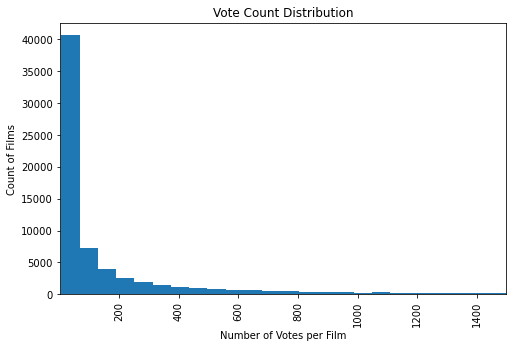

In [14]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 5))
# Create variables for easier reuse
# numratings = ratings["numvotes"].value_counts()
# Plot data
ax.hist(ratings['numvotes'],bins=30000)
plt.xlim([1,1500])
# Customize appearance
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Count of Films")
ax.set_xlabel("Number of Votes per Film")
ax.set_title("Vote Count Distribution")

In [15]:
ratings=ratings.loc[ratings['numvotes']>=200]

Number of reviews for each film is an inherently flawed metric. As an example, some  films that are targeted to a younger audience, may have viewers that are inherently be more tech savvy. This makes it it more likely for those films to have a higher amount of reviews. Despite this critical flaw, audience reviews are the only true metric to see how impactful a film was on its viewers. 

Upon looking at the distribution of 'review_count' for the films in the database, the majority of films have less than 1000 reviews. 75% of the films in the table have data over 365 votes. In order to keep the bulk of the review data, which will end up being our main metric of analysis, movies with ratings over ~200 were chosen to keep over ~75% of the data, while still avoiding the films on the fringe that have too little reviews. This step will eliminate bias due to low review rates within any given film. 

In subsequent steps/analyses, it is important to keep as many films as possible within the analysis when evaluating successful directors, actors, and genres.

In [16]:
tn['release_year']=tn['release_date'].str[-4:]
tn['release_year']=tn['release_year'].astype(int)
tn=tn[tn['release_year']>=1980]
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


As seen in the above manipulation, the dataset is limited to films that were made in the last ~40 years. This is done in order to keep the dataset relevant to the modern age of film. The year 1980 is chosen, as it is safe to assume that actors/directors who started their career in this decade would likely be done with their career by now. For the purpose of this analysis, and Microsoft wanting to make a brand new studio,potential records should be limited to working casts/film staff that are still relatively active.

When considering both IMDB and The Numbers datasets, there is no common identifier/key linking the two. Therefore, the closest field available would be 'movie' (The Numbers) and 'primary_title' (IMDB), both fields dictating the most relevant/commonly known title across both datasets. Even though some films have a domestic_gross value listed as 0, all row data should be kept, as 'production_budget' is still a metric that contributes to overall cost/success of a film.

The financial data is stored as strings, so there will be some external manipulation required in order to get the data cleaned. 

In [17]:
titlebasics.set_index('tconst',inplace=True)
namebasics.set_index('nconst',inplace=True)
principals.set_index('nconst',inplace=True)
ratings.set_index('tconst',inplace=True)

Indexes are set to prepare the joining between each table.

In [18]:
principalswinfo=principals.join(namebasics, how='inner', lsuffix='p',rsuffix='n')
principalswinfo=principalswinfo.reset_index()
#joining namebasics table to append relevant information about people

principals=principals.reset_index()
principals.set_index('tconst', inplace=True)
#prepping principals

movies_crew=pd.concat([principals,titlebasics],join='inner',axis=1)
movies_crew=movies_crew.reset_index()
#adding crew names to the overall movie info table

movies_crew.set_index('tconst', inplace=True)
movieswratings=movies_crew.join(ratings,how='left',lsuffix='m',rsuffix='r')
#adding rating info to the overall table 

movieswratings=movieswratings.reset_index()
movieswratings.set_index('tconst',inplace=True)

principalswinfo.set_index('tconst',inplace=True)
moviesfull=movieswratings.join(principalswinfo, how='left', lsuffix='m',rsuffix='p')
#finally, adding names to the overall movie data table

moviesfull=moviesfull.reset_index()
moviesfull.head(5)

,tconst,nconstm,categorym,primary_title,start_year,genres,averagerating,numvotes,nconstp,categoryp,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,nm0006210,composer,Sunghursh,2013,"Action,Crime,Drama",NaN,NaN,nm1391276,writer,Anjana Rawail,3000.0,0.0,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540"
1,tt0063540,nm0474801,actor,Sunghursh,2013,"Action,Crime,Drama",NaN,NaN,nm1391276,writer,Anjana Rawail,3000.0,0.0,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540"
2,tt0063540,nm0904537,actress,Sunghursh,2013,"Action,Crime,Drama",NaN,NaN,nm1391276,writer,Anjana Rawail,3000.0,0.0,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540"
3,tt0063540,nm0756379,actor,Sunghursh,2013,"Action,Crime,Drama",NaN,NaN,nm1391276,writer,Anjana Rawail,3000.0,0.0,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540"
4,tt0063540,nm0474876,actor,Sunghursh,2013,"Action,Crime,Drama",NaN,NaN,nm1391276,writer,Anjana Rawail,3000.0,0.0,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540"


Above, the collective IMDB dataset is linked using their respective table primary keys.


In [19]:
moviesfull.set_index('primary_title',inplace=True)
tn.set_index('movie', inplace=True)
moviesfullwbudget=moviesfull.join(tn, how='left', lsuffix='t')
moviesfullwbudget=moviesfullwbudget[moviesfullwbudget['production_budget'].notna()]
moviesfullwbudget=moviesfullwbudget.reset_index()

moviesfullwbudget.head(10)

,index,tconst,nconstm,categorym,start_year,genres,averagerating,numvotes,nconstp,categoryp,...,birth_year,death_year,primary_profession,known_for_titles,id,release_date,production_budget,domestic_gross,worldwide_gross,release_year
0,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm0836964,director,...,1972.0,0.0,"actress,producer,director","tt3526286,tt0954947,tt0119822,tt0209958",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
1,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm2553586,producer,...,3000.0,0.0,"assistant_director,director,producer","tt1190689,tt4878612,tt1125849,tt5565334",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
2,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm2592905,producer,...,3000.0,0.0,"manager,producer,miscellaneous","tt3526286,tt0462519,tt1283887,tt1772261",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
3,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm4239131,actress,...,3000.0,0.0,actress,"tt2357547,tt1767382,tt1990422,tt3526286",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
4,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm4509944,producer,...,3000.0,0.0,"producer,miscellaneous,production_manager","tt4041636,tt3778354,tt4779776,tt3526286",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
5,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm5376482,actress,...,3000.0,0.0,"actress,writer","tt2217859,tt3526286,tt0203259,tt4474344",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
6,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm6344380,actress,...,3000.0,0.0,actress,"tt3526286,tt3391594",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
7,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm6344381,actress,...,3000.0,0.0,actress,tt3526286,16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
8,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm7724674,composer,...,3000.0,0.0,"soundtrack,composer,music_department","tt5109802,tt2381046,tt3526286,tt3462710",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0
9,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm7724675,composer,...,3000.0,0.0,"composer,soundtrack","tt3526286,tt3462710",16.0,"Nov 20, 2015","$1,500,000",$0,$0,2015.0


The budgets for each movie (where applicable) are added to the overall table using a left join, to ensure all IMDB records are kept. The 'moviesfull' table is kept as an overall reference, while 'moviesfullwbudget' is stored as an overall copy of the main table, filtering values where not null to ensure that the dataset contains all available financial information. The 'primary_title' key is used for the moviesfull table as within IMDB, 'primary_title' has the highest likelihood to be used as a link, since it is the most commonly used name. The 'movie' field within The Numbers dataset is the only field that relatively looks like a title. 

In [20]:
moviesfullwbudget['production_budget']=moviesfullwbudget['production_budget'].map(lambda x: x.strip('$,,'))
moviesfullwbudget['domestic_gross']=moviesfullwbudget['domestic_gross'].map(lambda x: x.strip('$,,'))
moviesfullwbudget['worldwide_gross']=moviesfullwbudget['worldwide_gross'].map(lambda x: x.strip('$,,'))

moviesfullwbudget['production_budget']=moviesfullwbudget['production_budget'].map(lambda x: int(x.replace(',','')))
moviesfullwbudget['domestic_gross']=moviesfullwbudget['domestic_gross'].map(lambda x: int(x.replace(',','')))
moviesfullwbudget['worldwide_gross']=moviesfullwbudget['worldwide_gross'].map(lambda x: int(x.replace(',','')))

moviesfullwbudget['profit_ratio']=(moviesfullwbudget['worldwide_gross'])/moviesfullwbudget['production_budget']

Additional manipulation is done in order to convert the financial data from strings into integers, so mathematical operations can be performed on the relevant columns. A column of 'profit_ratio' is created, which will be one of the critical metrics used to evaluate success. 'profit_ratio' is calculated by taking the overall 'worldwide_gross' that a movie accrued, divided by the initial 'production_budget'. This metric tells us how profitable a film ended up being; more profit is ideal for a fledgeling  studio.

The profit ratio values mostly fall between 0 and 5. 

Now that all relevant fields have been cleaned, analysis can now be performed on the overall table.

## Data Modeling

### Finding the Best Directors

A great movie is defined by its director, who can change the way the film is understood through the eyes of a viewer. 
As seen in 2013 film 'Prisoners', Denis Villenueve strategically uses prolonged shots and framing to invoke a sense of tension, where other directors using this technique wouldn't nearly achieve the same effect. In contrast, Wes Anderson's particularity when it comes to set design and shot selection imbues his films with a style that can be only recognized as his. A good director can immerse you in a fictional world filled with character depth and development all within the span of a couple of hours. Success of film directors will be determined from the audience's perspective through the metric of user ratings, and from a financial perspective using budget numbers.


In [21]:
director=moviesfull[(moviesfull['categoryp']=='director') &(moviesfull['categorym']=='director')]

director=director.reset_index()
directorrat=director[['averagerating','numvotes','primary_name']]
directorrat=directorrat[directorrat['averagerating'].notna()]
directorrat=directorrat.drop_duplicates(keep='first')
directorrat.head()

,averagerating,numvotes,primary_name
6,6.8,451.0,Ágnes Kocsis
9,7.8,584.0,Marcell Jankovics
12,1.9,8248.0,Lawrence Kasanoff
23,3.9,219.0,Tony Vitale
25,5.1,287.0,Daniel St. Pierre


To begin to identify ideal directors, a subset is taken from the overall 'moviesfull' dataset where the 'categoryp' column, taken from the principals table, is equal to 'director'. This should give a list of all directors with their aggregated ratings from each movie. 

In [22]:
countdir=directorrat.groupby('primary_name')['averagerating'].agg(['count'])

Text(0.5, 1.0, 'Director Film Counts Distribution')

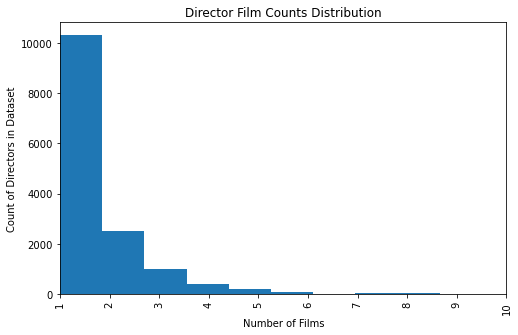

In [23]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 5))
# Create variables for easier reuse
value_counts = countdir["count"].value_counts()
# Plot data
ax.hist(countdir['count'],bins=20)
plt.xlim([1,10])
# Customize appearance
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Count of Directors in Dataset")
ax.set_xlabel("Number of Films")
ax.set_title("Director Film Counts Distribution")

In [24]:
countdir=countdir[countdir['count']>2]

A count is then taken of each director's distinct films with available ratings. A high count of films is ideal, as a greater number of films implies reputability which is one of the factors of interest. 
As seen from the histogram, the majority of directors in the dataset only have <2 films with ratings listed in IMDB. Unfortunately, this means that a large number of records must be stripped in order to ensure that a director is not judged solely out off of one or 2 films. Bias is likely to form in the decision making process if a producer only has 2 great films, or 2 poorly performing films.



In [49]:
avgratdir=directorrat.groupby('primary_name')['averagerating'].agg(['mean']).sort_values(by='mean', ascending=False)

directorswratings=countdir.join(avgratdir, how='inner')
directorswratings=directorswratings.sort_values('mean', ascending=False)
directorswratings.head(10)

,count,mean
primary_name,,
Steve Ravic,3,8.800000
Quentin Tarantino,4,8.675000
Christopher Nolan,4,8.425000
Vetrimaaran,3,8.400000
Rishab Shetty,3,8.366667
Ermalo Magradze,3,8.333333
Anthony Russo,4,8.225000
Joe Russo,4,8.225000
Elizabeth Blake-Thomas,3,8.166667


The table above shows directors sorted by their average IMDB rating. If Microsoft is more concerned with producing films that will satisfy their audiences, this table should be used for reference when selecting directors.

Below, the method for finding optimal directors is done through a different approach, selections calculated using financial information. Both resulting output tables can be used in conjunction in order to find directors that will make great, profitable films. 

In [26]:
dirbudgets=moviesfullwbudget[moviesfullwbudget['domestic_gross']!=0]
dirbudgets=dirbudgets[(dirbudgets['categoryp']=='director') & (dirbudgets['categorym']=='director')]
dirbudgets=dirbudgets.reset_index()
dirbudgets=dirbudgets[['index','primary_name','production_budget','profit_ratio']]
dirbudgets.head()

,index,primary_name,production_budget,profit_ratio
0,10 Cloverfield Lane,Dan Trachtenberg,5000000,21.657284
1,10 Days in a Madhouse,Timothy Hines,12000000,0.001218
2,12 Rounds,Gabriel Soriano,20000000,0.865332
3,12 Strong,Nicolai Fuglsig,35000000,2.031954
4,12 Years a Slave,Steve McQueen,20000000,9.051267


From the overall director dataset, desired financial information is pulled for analysis. data is filtered where 'domestic_gross' is not null, in order to only look at films with available metrics.

In [27]:
dirprofitratio=dirbudgets.groupby('primary_name')['profit_ratio'].agg(['mean']).sort_values(by='mean', ascending=False)
dirprofitratio=dirprofitratio[dirprofitratio['mean']>1]
#the tendency for a director to profit off of a movie

totalbudget=dirbudgets.groupby('primary_name')['production_budget'].agg(['mean']).sort_values(by='mean', ascending=False)
#how much total money a director has been entrusted

countofmovies=dirbudgets.groupby('primary_name')['index'].agg(['count']).sort_values(by='count', ascending=False)
#count of movies with budget data available

Above metrics are calculated for analysis:

'dirprofit' ratio aggregates directors by their average calculated profit ratio. This metric shows how profitable a film director tends to be across all of their films. directors with a profit ratio greater than 1 are selected, in order to solely look at films where the director/film studio made a profit off of their initial investment. 

'totalbudget' aggregates directors by the average budget they are given to produce their films. it's safe to assume that if a film studio trusts a director to work with a high production budget, they are known to be a reputable film maker who will get them their return on investment (roi)

'countofmovies' aggregates director names by the count of hteir films available in the dataset.. This field is used merely to contextualize the selections. microsoft may opt to not use a director with a high profit ratio/average budget if their overall film count is low.


In [28]:
dirprofitratio=dirprofitratio.reset_index()
countofmovies=countofmovies.reset_index()

dirprofitratio.set_index('primary_name', inplace=True)
countofmovies.set_index('primary_name', inplace=True)

directorswbudget=dirprofitratio.join(countofmovies, how='inner')
directorswbudget=directorswbudget.sort_values(['count','mean'], ascending=[False, False])

directorswbudget=directorswbudget.reset_index()
totalbudget=totalbudget.reset_index()

directorswbudget.set_index('primary_name', inplace=True)
totalbudget.set_index('primary_name', inplace=True)

#prepping for joining

In [52]:
directors_final=directorswbudget.join(totalbudget, how='inner', rsuffix='b')
directors_final=directors_final.rename(columns={"mean":"average_profitratio","count":"count_of_films","meanb":"mean_productionbudget"})


directors_final2=directors_final.join(directorswratings, how='inner')
directors_final2=directors_final2.rename(columns={"count":"count_filmsratings","mean":"average_imdbrating"})
directors_final2.head(15)


,average_profitratio,count_of_films,mean_productionbudget,count_filmsratings,average_imdbrating
primary_name,,,,,
Tim Story,6.235346,12,1.754274e+07,7,6.371429
Chris Renaud,8.487083,8,7.500000e+07,5,6.920000
Don Hall,3.531010,8,1.237500e+08,3,7.533333
Seth Gordon,1.788564,8,1.806250e+07,4,6.150000
Pierre Coffin,11.829330,7,7.357143e+07,3,7.133333
Steven Soderbergh,5.958500,7,2.152857e+07,9,6.600000
David Gordon Green,4.759385,7,1.971429e+07,8,6.225000
Peter Farrelly,3.999512,7,4.271429e+07,4,6.225000
Steven Spielberg,3.181121,7,9.214286e+07,7,7.228571


The final table contains the top film directors I would recommend for Microsoft to pursue for their film studio, from both a financial perspective, and an end user perspective. Assuming Microsoft is seeking to make the largest amount of profit, while still taking a director's reputability into account, the data is sorted first by count of films that made a profit, then by profitability rating. Assuming there is a desired range of budgets for produced films within the studio, the average film budget is also included within the overall table, so they can pick and choose from a range of budget points. 


## Finding the Best Actors/Actresses


While directors play a pivotal role in the success of a film, the characters on screen are the human element of a film, who the audience will inevitably connect with. Pairing a great director with great actors can result in a successful film, as seen in the case of 2019 "Once Upon a Time in Hollywood", directed by Quentin Tarantino, starring Margot Robbie and Leonardo Di Caprio. Actors can also be known to be able to "carry" a film despite shoddy script writing, and questionable editing choices. That said, in some cases, the actors in a film can be enough of a factor to make it successful. 

In [30]:
actorsfullwbudget=moviesfullwbudget[(moviesfullwbudget['categoryp']=='actor') |(moviesfullwbudget['categoryp']=='actress')]
actorsfullwbudget=actorsfullwbudget[(actorsfullwbudget['categorym']=='actor') |(actorsfullwbudget['categorym']=='actress') ]

actorsfullwbudget=actorsfullwbudget[['index','categorym','averagerating','numvotes','primary_name','production_budget','domestic_gross','worldwide_gross','profit_ratio']]
actorsfullwbudget=actorsfullwbudget.drop_duplicates(keep='first')

actorsfullwbudget=actorsfullwbudget.reset_index()
actorsfullwbudget.head()

,level_0,index,categorym,averagerating,numvotes,primary_name,production_budget,domestic_gross,worldwide_gross,profit_ratio
0,13,#Horror,actress,3.0,3092.0,Haley Murphy,1500000,0,0,0.000000
1,15,#Horror,actress,3.0,3092.0,Bridget McGarry,1500000,0,0,0.000000
2,16,#Horror,actress,3.0,3092.0,Sadie Seelert,1500000,0,0,0.000000
3,17,#Horror,actress,3.0,3092.0,Blue Lindeberg,1500000,0,0,0.000000
4,110,10 Cloverfield Lane,actor,7.2,260383.0,John Goodman,5000000,72082999,108286422,21.657284


The overall dataset (including budget) is filtered to only include actors/actresses

In [31]:
aggact=actorsfullwbudget[actorsfullwbudget['averagerating'].notna()]
aggact=aggact.groupby('primary_name')['averagerating'].agg(['count']).sort_values(by='count',ascending=False)

aggactrating=actorsfullwbudget[actorsfullwbudget['averagerating'].notna()]
aggactrating=aggactrating.groupby('primary_name')['averagerating'].agg(['mean']).sort_values(by='mean', ascending=False)

aggactbudget=actorsfullwbudget[actorsfullwbudget['production_budget'].notna()]
aggactbudget=aggactbudget.groupby('primary_name')['production_budget'].agg(['mean']).sort_values(by='mean', ascending=False)


print(aggact.head())
print(aggactrating.head())
print(aggactbudget.head())

                count
primary_name         
Robert De Niro     33
Dwayne Johnson     33
Mark Wahlberg      33
Steve Carell       31
Joel Edgerton      31
                  mean
primary_name          
Ella Smith         9.0
John Killoran      9.0
Jonny Lee Miller   9.0
Andreea Paduraru   9.0
Peter De Jersey    8.7
                       mean
primary_name               
Nako Mizusawa   425000000.0
Ai Hashimoto    425000000.0
Yuri Hane       425000000.0
Mizuki Sashide  425000000.0
Rikako Sakata   425000000.0


SImilarly to the quantified director metrics, the same metrics are caculated amongs the actor/actress dataset in order to isolate ideal actors

'aggact' aggregates actors names by the count of their films available in the dataset. This field is used merely to contextualize the selections. Microsoft may opt to not use an actor with a high profit ratio/average budget if their overall film count is low.

'aggactrating' aggregates actors by their average imdb rating. Again, if Microsoft values audience engagement/opinion, this metric will be critical when it comes to determining ideal actors. 

'aggactbudget' aggregates actors by the average budget on the films they work on. It's safe to assume that if a film studio books an actor on a film with high production budget, they will likely contribute to a high return on investment (ROI).



C:\Users\noahi\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\noahi\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Actor Rating Distribution')

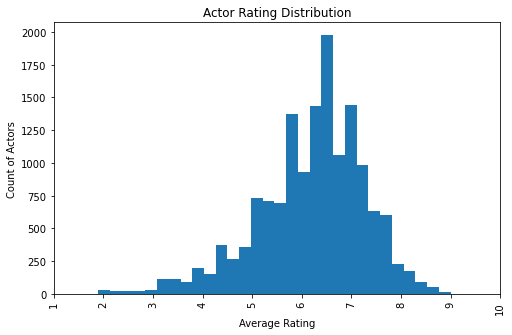

In [32]:
figx, ax1 = plt.subplots(ncols=1, figsize=(8, 5))
# Create variables for easier reuse
value_counts = actorsfullwbudget["averagerating"].value_counts()
# Plot data
ax1.hist(actorsfullwbudget['averagerating'],bins=30)
plt.xlim([1,10])
# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Count of Actors")
ax1.set_xlabel("Average Rating")
ax1.set_title("Actor Rating Distribution")

Above, a histogram is made to display the distribution of average ratings of actors. unfortunately, this distribution tells us that most actors ahve anaverage rating between 5 and 7. that being said, we can't rely on this average rating as a reliable metric, and will have to resort to financal metrics for the selection of desired actors/actresses. We will still use the average actor rating as a supplementary metric to sort by.

In [33]:
def f(row):
        if row>0 and row<=3:
            val = 3
        elif row>3 and row<=4:
            val = 4
        elif row>4 and row<=5:
            val = 5
        elif row>5 and row<=5.5:
            val = 5.5
        elif row>5.5 and row<=6:
            val = 6
        elif row>6 and row<=6.5:
            val = 6.5            
        elif row>6.5 and row<=7:
            val = 7
        elif row>7 and row<=7.5:
            val = 7.5
        elif row>7.5 and row<=8:
            val = 8
        elif row>8 and row<=9:
            val = 9
        else:
            val = 10
        return val


aggactrating['binnedrating']=aggactrating['mean'].apply(f)

aggactrating.head(10)

,mean,binnedrating
primary_name,,
Ella Smith,9.0,9.0
John Killoran,9.0,9.0
Jonny Lee Miller,9.0,9.0
Andreea Paduraru,9.0,9.0
Peter De Jersey,8.7,9.0
Hadley Fraser,8.7,9.0
Jacqueline Boatswain,8.7,9.0
Alfred Enoch,8.7,9.0
Sebastian Croft,8.7,9.0


A function is used to sort the average ratings into generalized bins. as there are several potential average ratings within a dataset (6.1,6.2,6.3), this binned value wil help us aggregate/sort by other values in the overall dataset. the range gets more granular between 5 and 8, as the majority of the binned data lies in the 5-8 rating range.

In [34]:
aggact=aggact.reset_index()
aggact.set_index('primary_name', inplace=True)
aggactrating=aggactrating.reset_index()
aggactrating.set_index('primary_name', inplace=True)

actors_wratings=aggact.join(aggactrating, how='inner',rsuffix='r')


actors_wratings=actors_wratings.reset_index()
actors_wratings.set_index('primary_name', inplace=True)
aggactbudget=aggactbudget.reset_index()
aggactbudget.set_index('primary_name', inplace=True)

actorsfull=aggactbudget.join(actors_wratings, how='inner', rsuffix='b')

actorsfull=actorsfull.sort_values(['count','binnedrating','mean'], ascending=[False, False, False])


actorsfull=actorsfull.rename(columns={"mean":"mean_productionbudget","count":"count_of_films","meanb":"averageIMDBrating"})
actorsfull.head(20)

,mean_productionbudget,count_of_films,averageIMDBrating,binnedrating
primary_name,,,,
Mark Wahlberg,6.282857e+07,33,6.527273,7.0
Dwayne Johnson,9.335455e+07,33,6.333333,6.5
Robert De Niro,3.224848e+07,33,6.330303,6.5
Joel Edgerton,4.978065e+07,31,6.783871,7.0
Steve Carell,4.106452e+07,31,6.716129,7.0
Jennifer Lawrence,9.947667e+07,30,6.880000,7.0
Matthew McConaughey,4.363333e+07,30,6.856667,7.0
Liam Neeson,6.476333e+07,30,6.423333,6.5
Channing Tatum,5.826333e+07,30,6.466667,6.5


Unsurprisingly, the actors/actresses included in the overall dataset are reputable, and are known for starring in blockbuster franchises/films. The data is first sorted by film count, then binned rating to prioritize audience satisfaction to a secondary degree.

## Finding the Best Genres

Thinking more generally apart from actors and directors, a common attribute that can have a great effect on the success of a movie is its genre. A genre of an upcoming film is most commonly communicated in its teasers/trailers. Impactful trailers for genres like horror will typically attract thrillseeking viewers looking to get a rush from being spooked. Action/adventure movies can be seen as a "safe" choice to pursue, as moviegoers would likely want to experience a visually stunning film on a larger screen with surround sound, inherently resulting in a high box office gross. Pairing the right genre with the right director and actors to ensure a melting pot of success within a film.

In [35]:
moviesfullwbudget['genresplit']=moviesfullwbudget['genres'].str.split(',')
moviesfullexploded=moviesfullwbudget.explode('genresplit')
#explode function
moviesfullexploded=moviesfullexploded.reset_index()
moviesfullexploded.head()

,level_0,index,tconst,nconstm,categorym,start_year,genres,averagerating,numvotes,nconstp,...,primary_profession,known_for_titles,id,release_date,production_budget,domestic_gross,worldwide_gross,release_year,profit_ratio,genresplit
0,0,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm0836964,...,"actress,producer,director","tt3526286,tt0954947,tt0119822,tt0209958",16.0,"Nov 20, 2015",1500000,0,0,2015.0,0.0,Crime
1,0,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm0836964,...,"actress,producer,director","tt3526286,tt0954947,tt0119822,tt0209958",16.0,"Nov 20, 2015",1500000,0,0,2015.0,0.0,Drama
2,0,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm0836964,...,"actress,producer,director","tt3526286,tt0954947,tt0119822,tt0209958",16.0,"Nov 20, 2015",1500000,0,0,2015.0,0.0,Horror
3,1,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm2553586,...,"assistant_director,director,producer","tt1190689,tt4878612,tt1125849,tt5565334",16.0,"Nov 20, 2015",1500000,0,0,2015.0,0.0,Crime
4,1,#Horror,tt3526286,nm7724675,composer,2015,"Crime,Drama,Horror",3.0,3092.0,nm2553586,...,"assistant_director,director,producer","tt1190689,tt4878612,tt1125849,tt5565334",16.0,"Nov 20, 2015",1500000,0,0,2015.0,0.0,Drama


Since the 'genres' column in the original dataset is inputted as a text string, the split function is used to parse out each genre from each column entry. The explode function is then used to isolate each movie/genre combination as its own row. While this creates duplicate records for each movie, this is seen as ideal when summarizing. The 'ratings' table has already been limited by number_of_votes >200, so keeping the maximum amount of rows when aggregating using genre would be ideal.

In [36]:
moviesfullexploded=moviesfullexploded[['tconst','averagerating','production_budget','domestic_gross','worldwide_gross','profit_ratio','genresplit']]
moviesfullexploded=moviesfullexploded.drop_duplicates(keep='first')
moviesfullexploded=moviesfullexploded[moviesfullexploded['genresplit'].notna()]
moviesratnotna=moviesfullexploded[moviesfullexploded['profit_ratio']!=0]
moviesratnotna.genresplit.value_counts()
moviesratnotna.head()

,tconst,averagerating,production_budget,domestic_gross,worldwide_gross,profit_ratio,genresplit
300,tt1179933,7.2,5000000,72082999,108286422,21.657284,Drama
301,tt1179933,7.2,5000000,72082999,108286422,21.657284,Horror
302,tt1179933,7.2,5000000,72082999,108286422,21.657284,Mystery
600,tt3453052,6.7,12000000,14616,14616,0.001218,Drama
700,tt3517850,NaN,20000000,12234694,17306648,0.865332,Action


Desired columns are isolated from the exploded table and distinct rows are selected.

In [37]:
genreprof=moviesratnotna.groupby('genresplit')['profit_ratio'].agg(['mean']).sort_values(by='mean',ascending=False)
genreprof.head(20)

,mean
genresplit,
Horror,7.745018
Mystery,7.442447
Thriller,5.455271
Family,5.101057
Musical,5.054059
Documentary,4.992545
Animation,4.943798
Romance,4.095652
History,4.041958


In [38]:
def g(row):
        if row>0 and row<=4:
            val = 4
        elif row>4 and row<=5:
            val = 5
        elif row>5 and row<=5.5:
            val = 5.5
        elif row>5.5 and row<=6:
            val = 6
        elif row>6 and row<=6.5:
            val = 6.5            
        elif row>6.5 and row<=7:
            val = 7
        elif row>7 and row<=7.5:
            val = 7.5
        elif row>7.5 and row<=8:
            val = 8
        elif row>8 and row<=9:
            val = 9
        else:
            val = 10
        return val

genreprof['binnedratio']=genreprof['mean'].apply(g)


Musical seems to be the most profitable genre, followed by Horror. The average rating value for each genre is binned for ease of sorting. 

Text(0.5, 1.0, 'Profit Ratio Distribution')

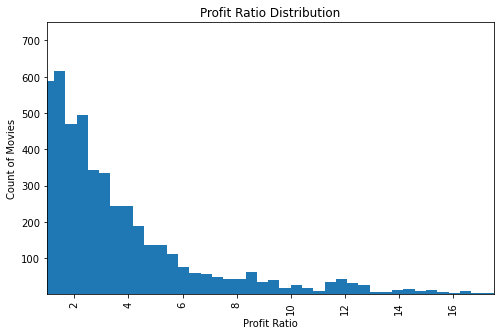

In [39]:
figx, ax1 = plt.subplots(ncols=1, figsize=(8, 5))
# Create variables for easier reuse
value_counts = moviesfullexploded["profit_ratio"].value_counts()
# Plot data
ax1.hist(moviesfullexploded['profit_ratio'],bins=1000)
plt.xlim([1,17.5])
plt.ylim([1,750])
# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Count of Movies")
ax1.set_xlabel("Profit Ratio")
ax1.set_title("Profit Ratio Distribution")

In [40]:
topratedgenres=moviesfullexploded.groupby('genresplit')['averagerating'].agg(['mean']).sort_values(by='mean',ascending=False)
topratedgenres.head(20)

,mean
genresplit,
Documentary,6.975510
Biography,6.958434
History,6.854237
War,6.745161
Sport,6.583333
Animation,6.533613
Western,6.464286
Drama,6.463312
Music,6.422414


Unfortunately, since all genres have an average rating between 5 and 7, this makes the rating variable hard to quantify by. The average rating will be used as a supplementary metric, not to sort by, but to contextualize selections, and see which genres may be received poorly by the audiences.

In [41]:
genrecounts=moviesfullexploded[['tconst','genresplit']].drop_duplicates(keep='first')
genrefilmcounts=genrecounts.groupby('genresplit')['tconst'].agg(['count']).sort_values(by='count', ascending=False)
genrefilmcounts.head(20)

,count
genresplit,
Drama,1690
Comedy,817
Action,656
Thriller,562
Adventure,466
Documentary,428
Horror,396
Crime,379
Romance,353


In [42]:
genrefilmcounts=genrefilmcounts[genrefilmcounts['count']>100]

It is safe to exclude genres with less than 100 movies categorized, as they appear to be subgenres. That being said, Microsoft would probably want to start as general as possible with their genre selection. Nobody would make a movie solely based on a subgenre, as that is inherently a risky financial move. War, Sport, Music, and Musical movies are very niche, and the average moviegoer may not opt to see them as a "safe" option for an enjoyable movie night.

In [43]:
genrebudget=moviesfullexploded[['production_budget','genresplit']].drop_duplicates(keep='first')
genrebudget=genrebudget[genrebudget['production_budget']!=0]
genrebudgets=genrebudget.groupby('genresplit')['production_budget'].agg(['mean']).sort_values(by='mean', ascending=False)

In [44]:
genretable1=genreprof.join(genrebudgets, how='inner', lsuffix='p')
genretable2=genretable1.join(genrefilmcounts, how='inner', lsuffix='f')
genretable=genretable2.join(topratedgenres, how='inner', lsuffix='t')
genretable=genretable.sort_values(['binnedratio','meant'], ascending=[False, False])
genretable=genretable.rename(columns={"meanp":"mean_profitratio","count":"count_of_films","meant":"mean_productionbudget","mean":"meanIMDBrating"})

genretable.head(15)

,mean_profitratio,binnedratio,mean_productionbudget,count_of_films,meanIMDBrating
genresplit,,,,,
Horror,7.745018,8.0,2.753423e+07,396,5.407885
Mystery,7.442447,7.5,2.731016e+07,234,6.050000
Family,5.101057,5.5,5.273897e+07,180,6.195370
Thriller,5.455271,5.5,3.654652e+07,562,5.886480
Animation,4.943798,5.0,7.429697e+07,138,6.533613
Documentary,4.992545,5.0,3.129773e+07,428,6.975510
Romance,4.095652,5.0,2.776343e+07,353,6.292164
Adventure,3.236764,4.0,8.339076e+07,466,6.395923
Action,2.971202,4.0,6.922477e+07,656,6.155292


[Text(0, 0, 'Drama'),
 Text(1, 0, 'Comedy'),
 Text(2, 0, 'Action'),
 Text(3, 0, 'Thriller'),
 Text(4, 0, 'Adventure'),
 Text(5, 0, 'Documentary'),
 Text(6, 0, 'Horror'),
 Text(7, 0, 'Crime'),
 Text(8, 0, 'Romance'),
 Text(9, 0, 'Mystery'),
 Text(10, 0, 'Biography'),
 Text(11, 0, 'Sci-Fi'),
 Text(12, 0, 'Fantasy'),
 Text(13, 0, 'Family'),
 Text(14, 0, 'Animation')]

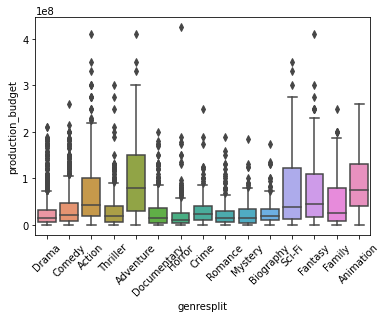

In [45]:
budget_boxplot=sns.boxplot(x=moviesratnotna['genresplit'], y=moviesratnotna['production_budget'], order=genrefilmcounts.index)
budget_boxplot.set_xticklabels(budget_boxplot.get_xticklabels(), rotation=45)

The "big-screen" film genres like Horror, Mystery, and Thriller unsurprisingly take the top slots in terms of profitability. The data is sorted by binned profitability as the main metric, then by average production budget for additional screening.
The production budget summarized by genre shows the Adventure, Sci-Fi, and Fantasy films with the highest budget distribution.

## Conclusions

Directors, actors and genres are critical elements that make films successful. The performed analysis of the datasets resulted in three sets of recommendations for ideal directors, actors, and genres to pursue in order to jump-start a successful movie studio. While the sets are helpful guidelines for choosing for each element, external research still needs to be done in order to find the combination that maximizes a film's profitability and audience reception.

__I would recommend that Microsoft pursues directors, actors, and genres from a variety of budget ranges; there can only be so many big-budget films before money becomes a limiting factor for a studio.__ That being said, directors/actors who show promise (in terms of user ratings) who typically operate under a relatively lower budget should be pursued as well. Prioritizing lower risk investments would help budding members of the industry advance their careers through a bigger studio. For these films, user ratings should be prioritized in the overall selections. As long as the respective audience can see the value in a director's/actor's choices, success is inherent.

Below are the selections from the dataset that I have chosen to maximize the metrics of success:

- DIRECTORS: Selections (in order of priority): Tim Story, Chris Renaud, Don Hall, Pierre Coffin, Steven Soderbergh, Steven Spielberg, Ariel Schulman, Henry Joost

- ACTORS/ACTRESSES: Selections (in order of priority): Mark Wahlberg, Dwayne Johnson, Robert De Niro, Joel Edgerton, Steve Carell, Jennifer Lawrence, Matthew McConaughey, Liam Neeson, Channing Tatum, Michael Fassbender, Amy Adams

- GENRES: Selections (in order of priority): Horror, Mystery, Thriller, Family, Documentary, Animation, Romance, Fantasy, Biography


Despite this intuitive ranking system, there are several factors which might cause this system to be imperfect. External factors such as scandals may cause certain actors/directors to be excluded from consideration solely due to their reputation. For actors/directors/studios that have never worked together, clashing personalities and artistic vision could be the result of catastrophic failure. As an example, despite the success of its predecessor, 'Iron Man', 'Iron Man 2' was received poorly by its critics. Director Jon Favreau reported that he wasn't able to make the film he wanted to make because of limitations/restrictions imposed by Kevin Fiege, the residing president of Marvel Studios. Granular looks at interviews/articles may reveal hidden tensions like the aforementioned, but it is impossible to quantify/standardize that information in a dataset.


### Limitations:

Through this project and the resulting analysis, there were several limitations, particularly when it came to the availability of information in the datasets. 

__First, a significant amount of data was missing in both the ratings dataset from IMDB and the financial dataset from The Numbers.__ If a film was not logged in IMDB's database and it ended up being a harshly critiqued/unprofitable film, the resulting metrics for that film's crew could be skewed due to exclusion. This makes it impossible to know the true holistic view of an actor's/director's capabilities. 
For some films that were present in IMDB's dataset, corresponding financial information was not available from Ihe Numbers dataset. The exclusion of films without financial data may result in a different priority rankings when it comes to aggregation.

With regard to the 'namebasics' table, the birth year & death year values were not populated for every 'nconst'. This inherently creates problems as directors/actors who have passed or retired could severely limit the resulting filtered dataset. 

__User rating is inherently a subjective/imperfect metric.__ For any given movie, it is impossible to determine if the user rating audience base is cmpletely unbiased. As an example, movies with particularly high fanbases such as the Marvel Cinematic Universe may have several users rate the movies highly as they are fans of the character portrayals. If the logged reviews are solely created by Marvel fans, it is natural for a Marvel film to have obscenely high ratings relative to other movies. If more critics with a more critical eye for artistic choices/acting in film were to review a Marvel movie, the overall rating would undoubtedly go down. Each film critic, whether casual or professional, has their own bias; they may choose to only watch certain movies over others. 

__Overall, when any movie title is searched via Google, a wide variety of review aggregation metrics can be seen from different companies, some with their own unique metrics.__ Since only IMDB was used to quantify user satisfaction, a successful film according to their available metrics may have done poorly on a different website.



### Next Steps:


As previously mentioned, external research would have to be done in order to find the ideal combinations of genres, directors, and actors in a film. 

__Finding each director/actor's ideal genre would unveil ideal pairings between the two, resulting in well made films.__ On an more granular level, an additional flags/field designating actors and directors that have historically worked on movies together could be included. The new fields would identify if their resulting collaboration was successful, and this information would be used to prioritize ideal pairings. 

__Review aggregate data from websites other than IMDB should also be included in the overall dataset.__ Films present in IMDB may not be present in rotten tomatoes, and vice versa. Having a larger amount of review data from various sources to work with would eliminate some bias. 

__While directors and actors are vital to making a film successful, as recent years have shown, CGI (computer-generated imagery) can be a selling point for a film; isolating editors would be a point of interest to explore as well.__ Editors that can be trusted with big budgets can engage an audience with a movie to a greater degree. The same can be made for the case of writers. Good writers tell good stories, and no amount of good acting/directing cn fix a bad plot. In the end, every crew member has a direct contribution to a film's perceived success. 
